In [1]:
from constants import *
from scripts.scripts import *
from scripts.gdal_scripts import *

In [2]:
main_name = "test_grid02" # name of csv file.
file = gdal_open_shp(shp_name=main_name)
gdal_print_first_feature(file=file)
print("")
gdal_print_metadata(tif_name=main_name)    

{"type": "Feature", "geometry": {"type": "Point", "coordinates": [9.065843041, 56.83518536]}, "properties": {"lat": 56.83518536, "lon": "9.065843041", "value": 100}, "id": 1}

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02.tif
Size is 256, 256
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000002829859375,0.000001506484375)
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) 
Lower Left  (   9.0658430,  56.8351945) 
Upper Right (   9.0665675,  56.8348089) 
Lower Right (   9.0665675,  56.8351945) 
Center      (   9.0662053,  56.8350017) 
Band 1 Block=256x16 Type=Int16, ColorInterp=Gray



Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-outsize', '64', '64', '-a', 'invdist:power=3:radius1=6e-05:radius2=3e-05:max_points=4:', '-zfield', 'value']
Running interpolation on: shapefiles/test_grid02.shp.zip
Saving to: tif_files/test_grid02-invdist-3-None-6e-05-3e-05-None-4-0.tif


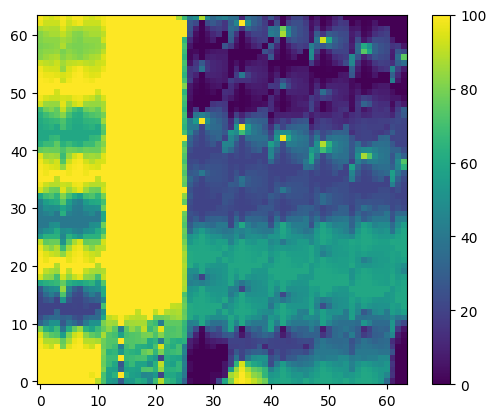

In [23]:
tif_name = gdal_run_interpolation(
    input_shp_name=main_name,
    target_column="value",
    output_tif_name=main_name,
    algorithm="invdist",
    power=3,
    radius1=0.00006,
    radius2=0.00003,
    max_points=4,
    # output_res= [0.00001, 0.00001],
    width=64,
    height=64
)
plot_raster(tif_name=tif_name)

In [21]:
gdal_print_metadata(tif_name=tif_name)

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02-invdist-3-None-6e-05-3e-05-None-4-0.tif
Size is 64, 64
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000011319437500,0.000006025937500)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) (  9d 3'57.03"E, 56d50' 5.31"N)
Lower Left  (   9.0658430,  56.8351945) (  9d 3'57.03"E, 56d50' 6

Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-outsize', '64', '64', '-a', 'average:power=3:smoothing=0.001:radius1=6e-05:radius2=3e-05:max_points=4:', '-zfield', 'value']
Running interpolation on: shapefiles/test_grid02.shp.zip
Saving to: tif_files/test_grid02-average-3-0.001-6e-05-3e-05-None-4-0.tif


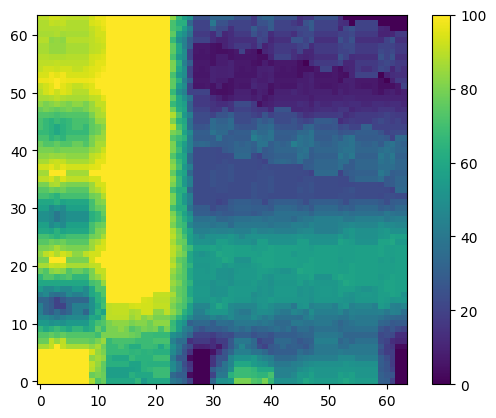

In [24]:
tif_name = gdal_run_interpolation(
    input_shp_name=main_name,
    target_column="value",
    output_tif_name=main_name,
    algorithm="average",
    power=3,
    radius1=0.00006,
    radius2=0.00003,
    max_points=4,
    width=64,
    height=64,
    smoothing=0.001,
)
plot_raster(tif_name=tif_name)